In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glob
from itertools import cycle

import librosa
import librosa.display
import IPython.display as ipd
from sklearn.metrics import confusion_matrix

sns.set_theme(style="white", palette=None)

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(color_pal)

In [10]:
audio_files = glob.glob("./Ravedess_dataset/*/*.wav")
ipd.Audio(audio_files[0])

In [13]:
y , sr = librosa.load(audio_files[0])
print(f"shape of y:{y.shape}")
print(f"sr:{sr}")

shape of y:(72838,)
sr:22050


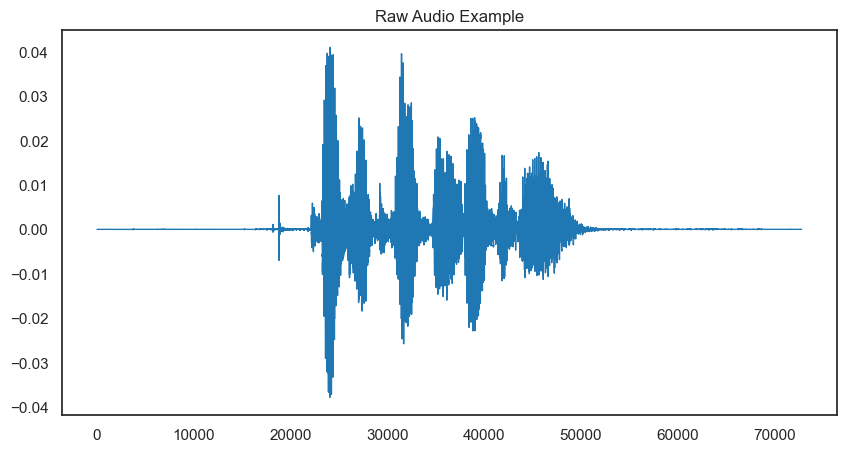

In [16]:
pd.Series(y).plot(figsize=(10,5), lw=1, title="Raw Audio Example")
plt.show()

In [ ]:
S = librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128)

S_db = librosa.amplitude_to_db(S, ref=np.max)



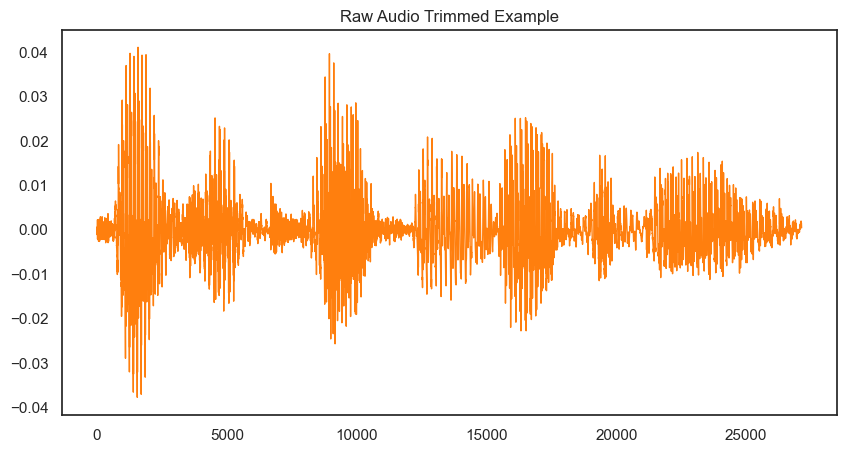

In [24]:
y_trimmed , _ = librosa.effects.trim(y,top_db=20) # It removes the silent audio

pd.Series(y_trimmed).plot(figsize=(10,5),lw=1,title="Raw Audio Trimmed Example",color=color_pal[1])
plt.show()

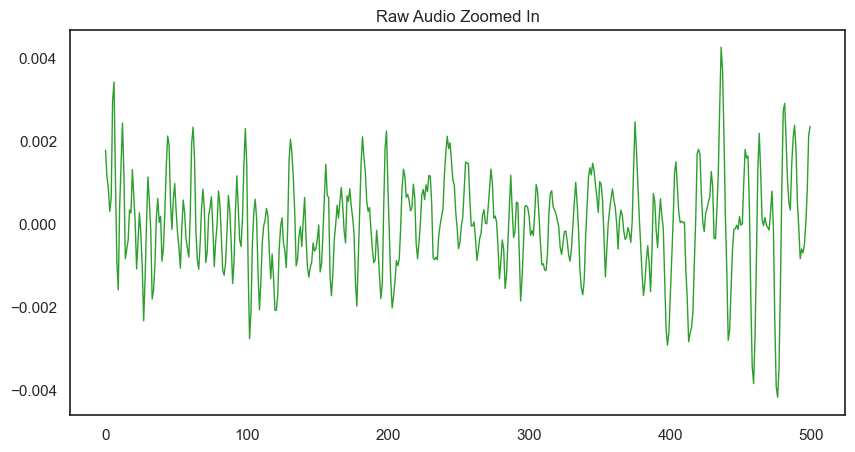

In [29]:
pd.Series(y[30000:30500]).plot(figsize=(10,5),lw=1,title="Raw Audio Zoomed In",color=color_pal[2])
plt.show()

### Spectogram

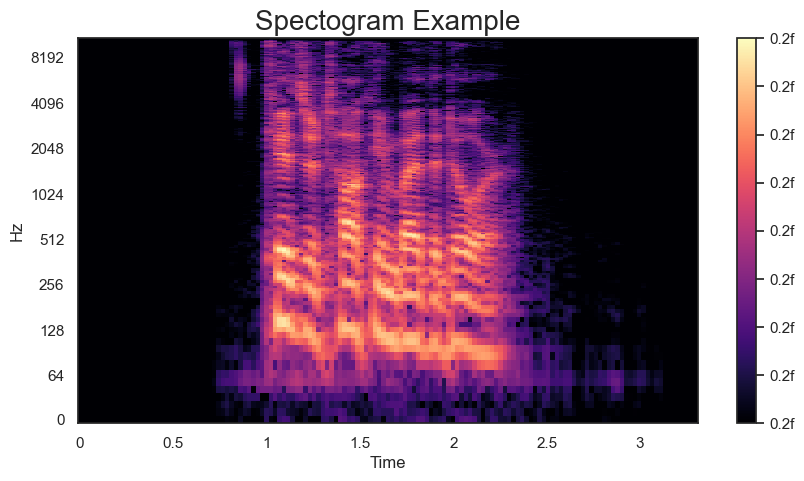

In [35]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D) , ref=np.max)

fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db , x_axis="time",y_axis="log",ax=ax)  
ax.set_title('Spectogram Example',fontsize=20)
fig.colorbar(img,ax=ax,format=f'0.2f')
plt.show()

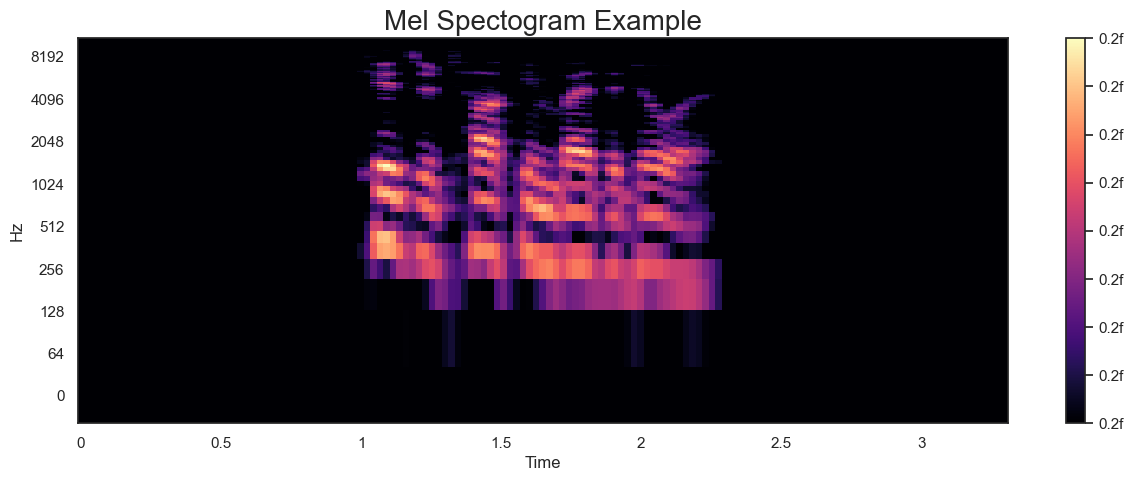

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
S = librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128*2)

S_db_mel = librosa.amplitude_to_db(S_db_mel, ref=np.max)
img = librosa.display.specshow(S_db , x_axis="time",y_axis="log",ax=ax)  
ax.set_title('Mel Spectogram Example',fontsize=20)
fig.colorbar(img,ax=ax,format=f'0.2f')
plt.show()

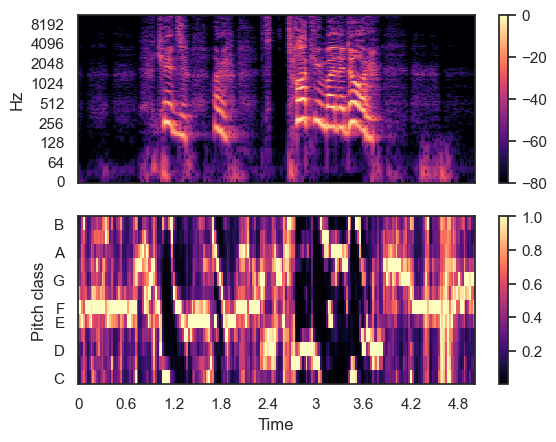

In [52]:
chroma = librosa.feature.chroma_stft(y=y,sr=sr)
S = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
plt.show()

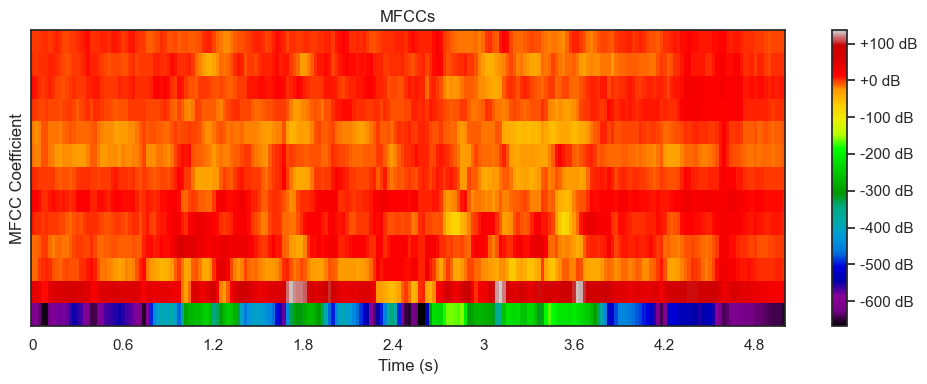

In [8]:
audio_path = glob.glob("./Ravedess_dataset/*/*.wav")
y, sr = librosa.load(audio_path[40])

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis=None, cmap='nipy_spectral')
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficient")
plt.title("MFCCs")
plt.tight_layout()
plt.show()

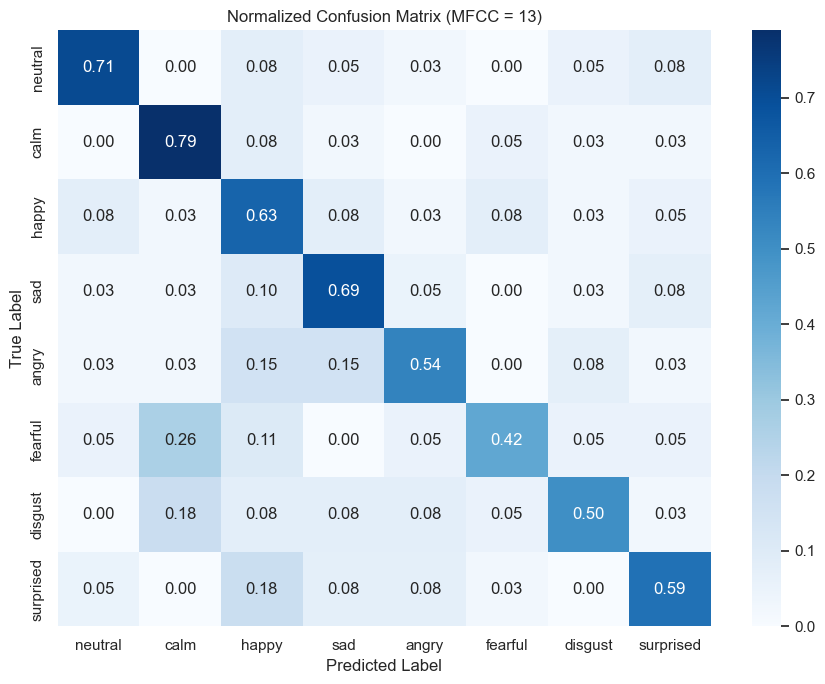

In [59]:
from SVM_accuracy import y_pred , y_test

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
cm_norm = np.nan_to_num(cm_norm)

labels = ["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]
plt.figure(figsize=(9, 7))
sns.heatmap(
    cm_norm,
    xticklabels=labels,
    yticklabels=labels,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar=True
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (MFCC = 13)")
plt.tight_layout()
plt.show()